In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd #Import our data
import matplotlib.pyplot as plt #Interactive Visualization
import seaborn as sns #Data visualization
import numpy as np #Mathematical operations

Iris_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Maze/K-means Clustering/IrisData.csv")
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

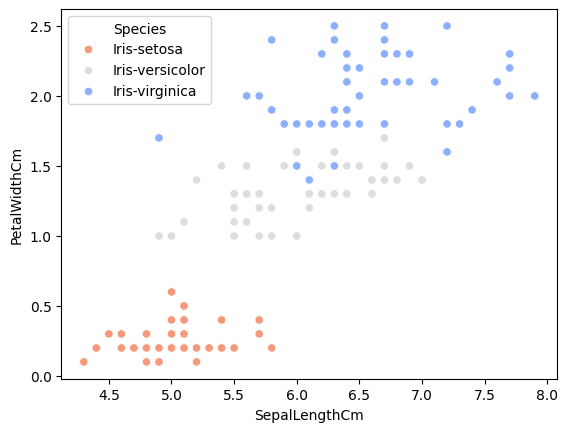

In [ ]:
sns.scatterplot(data = Iris_data, x = "SepalLengthCm", y = "PetalWidthCm", hue = Iris_data.Species, palette = "coolwarm_r")

In [ ]:
from sklearn.cluster import KMeans

X = Iris_data[["SepalLengthCm","PetalWidthCm"]]
#by default it uses the kmeans++ initialization
#random_state - to make sure we have the same random each time we run the cell
km = KMeans(n_clusters = 3, n_init = 3, init = "random", random_state = 42)
km.fit(X)
y_kmeans = km.predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0], dtype=int32)

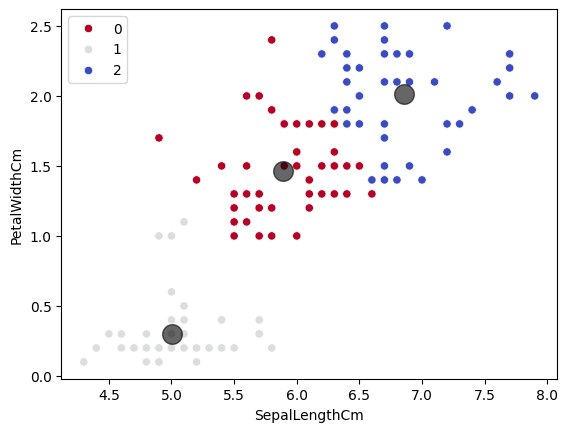

In [ ]:
sns.scatterplot(data = Iris_data, x = "SepalLengthCm", y = "PetalWidthCm", hue = y_kmeans, palette = "coolwarm_r")

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha = 0.6)

0 : Iris-versicolor,
1 : Iris-setosa,
2 : Iris-virginica,

In [ ]:
km.inertia_ #objective function

32.76801587301588

In [ ]:
newdata = [[4.7,0.8]]
y_pred = km.predict(newdata)
print(y_pred)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


#####**Choosing Number of Clusters**

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

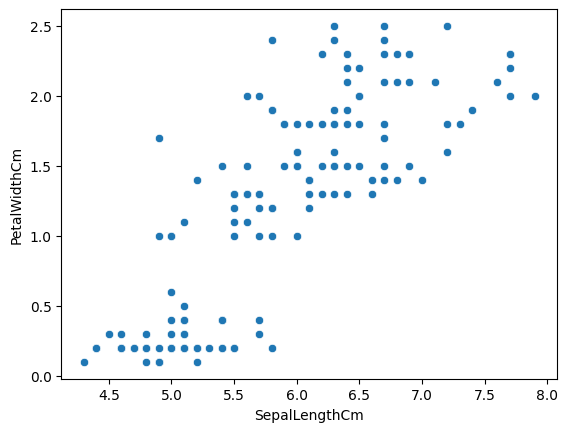

In [ ]:
sns.scatterplot(data = Iris_data, x = "SepalLengthCm", y = "PetalWidthCm")

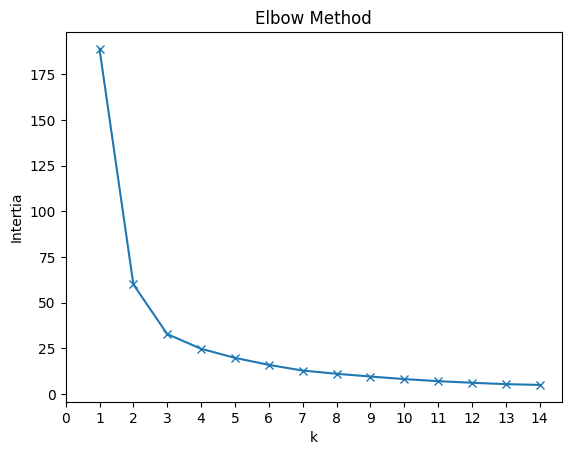

In [ ]:
#Elbow Method
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init=10) #n_init =  explicit number of times the k-means algorithm will be run with different centroid seeds
    km = km.fit(X)
    intertia.append(km.inertia_)

plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

The elbow point in this graph is three, which is suitable.